> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# TMDB movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
import pandas as pd
import numpy as np
from matplotlib  import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df=pd.read_csv("tmdb-movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After looking into the dataset I am going to find answers for the following questions:

1.) How have been the popularity of genres throughout the timeline (1966-2015)?

2.) Relation between popularity,budget and revenue?
    a.) How is budget and revenue related?
    b.) How is popularity and revenue related?
    c.) How is budget and popularity related?
    
3.) Whose movie earned the highest total revenue? 
    a.) Leonardo DiCaprio
    b.) Harrison Ford
    c.) Dwayne Johnson
    d.) Tom Cruise
    e.) Christian Bale



### Data Cleaning 



-> For my analysis I will be needing id, populairty, budget, revenue, original_title, cast, genres and release_year. Rest all columns will be dropped.

-> For better sake I will round off popularity to 2 decimal points.

-> Removing other genres except for the first one

->Filling null values of cast and genres with unknown

->Filling 0 of Budget and revenue with the mean value of budget and revenue


**Define**

Changing dataType of budget and revenue.

Dropping unncecessary columns.

**Code**

In [6]:
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

In [7]:
df=df.drop(["homepage","director","tagline","imdb_id","keywords","overview","runtime","release_date","production_companies","vote_count","vote_average",
        "budget_adj","revenue_adj"],axis=1)



**Test**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int32
revenue           10866 non-null int32
original_title    10866 non-null object
cast              10790 non-null object
genres            10843 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 594.3+ KB


**Define**

Filling null values of genres and Cast with "Unknown"

Removing others genres after "|".

**Code**

In [9]:
df['genres'] = df['genres'].fillna('Unknown')
df['genres']=df['genres'].apply(lambda x: x.split('|')[0])
df['genres'].head(5)

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [10]:
df.query('genres == "Unknown"').head(10)

,id,popularity,budget,revenue,original_title,cast,genres,release_year
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Unknown,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Unknown,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Unknown,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Unknown,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Unknown,2009
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Unknown,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,Unknown,2010
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,Unknown,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Unknown,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Unknown,2012


In [11]:
df['cast'] = df['cast'].fillna('Unknown')
df.query('cast == "Unknown"').head(10)

,id,popularity,budget,revenue,original_title,cast,genres,release_year
371,345637,0.422901,0,0,Sanjay's Super Team,Unknown,Animation,2015
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,Unknown,Documentary,2015
465,321109,0.201696,0,0,Bitter Lake,Unknown,Documentary,2015
536,333350,0.122543,0,0,A Faster Horse,Unknown,Documentary,2015
538,224972,0.114264,0,0,The Mask You Live In,Unknown,Documentary,2015
587,319091,0.062536,0,0,The Hunting Ground,Unknown,Documentary,2015
600,332479,0.047256,0,0,Star Wars: TIE Fighter,Unknown,Science Fiction,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,Unknown,Unknown,2015
1088,169607,0.226028,0,1503616,Finding Vivian Maier,Unknown,Documentary,2014
1173,261041,0.159037,0,0,The Search for General Tso,Unknown,Documentary,2014


**Test**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int32
revenue           10866 non-null int32
original_title    10866 non-null object
cast              10866 non-null object
genres            10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 594.3+ KB


**Define**

Roudning  of popularity to 2 decimal values

**Code**

In [13]:
df['popularity']=round(df['popularity'],2)

**Test**


In [14]:
df['popularity'].head()

0    32.99
1    28.42
2    13.11
3    11.17
4     9.34
Name: popularity, dtype: float64

**Define**

Filling 0 of Budget and revenue with mean values.

**Code**

In [15]:
df['reveue']=df['revenue'].replace(0,df['revenue'].mean())
df['budget']=df['budget'].replace(0,df['budget'].mean())

<a id='eda'></a>
##  Data Analysis and Visualization

 
###  1.) How have been the popularity of different genres through the timeline (1966-2015)?

In [16]:
df['genres'].value_counts()


Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Unknown              23
Foreign               9
Name: genres, dtype: int64

There are 21 genres, of them I am going to pick 4 genres which I like the most.

1.) Adventure 
 2.) Thriller
   3.) Comedy
     4.) Animation



In [17]:
df_adventure=df[df['genres'].str.contains('Adventure')]

I verified by counting the number of entries in df_adventure dataframe with original dataframe having 'Adventure' in genre

In [19]:
df.genres.str.contains('Adventure').sum() == df_adventure['id'].count()

True

In [20]:
decades=[1960,1965,1970,1975,1980,1985,1990,1995,2000,2010,2015,2020]

decade_name=['1960','1965','1970','1975','1980','1985','1990','1995,2000','2005','2010','2015']

df_adventure['release_decade']=pd.cut(df['release_year'],decades,labels=decade_name)

df_adventure.head()

C:\Users\AARYA BRAHMANE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,popularity,budget,revenue,original_title,cast,genres,release_year,reveue,release_decade
2,262500,13.11,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure,2015,295238201.0,2010
34,257445,3.64,58000000.0,150170815,Goosebumps,Jack Black|Dylan Minnette|Odeya Rush|Amy Ryan|...,Adventure,2015,150170815.0,2010
37,105864,3.34,175000000.0,331926147,The Good Dinosaur,Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...,Adventure,2015,331926147.0,2010
52,253412,2.80,55000000.0,203427584,Everest,Jason Clarke|Jake Gyllenhaal|Josh Brolin|John ...,Adventure,2015,203427584.0,2010
73,266647,2.23,150000000.0,128388320,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Adventure,2015,128388320.0,2010


In [21]:
a=df_adventure.groupby('release_decade')['popularity'].mean()
a

release_decade
1960         0.869444
1965         0.686923
1970         0.771429
1975         1.409500
1980         1.006818
1985         0.888571
1990         0.867727
1995,2000    0.962373
2005         1.341549
2010         1.600427
2015              NaN
Name: popularity, dtype: float64

In [22]:
df_thriller=df[df['genres'].str.contains('Thriller')]
df_comedy=df[df['genres'].str.contains('Comedy')]
df_animation=df[df['genres'].str.contains('Animation')]

In [23]:
decades=[1960,1965,1970,1975,1980,1985,1990,1995,2000,2010,2015,2020]

decade_name=['1960','1965','1970','1975','1980','1985','1990','1995,2000','2005','2010','2015']

df_thriller['release_decade']=pd.cut(df['release_year'],decades,labels=decade_name)
df_comedy['release_decade']=pd.cut(df['release_year'],decades,labels=decade_name)
df_animation['release_decade']=pd.cut(df['release_year'],decades,labels=decade_name)

C:\Users\AARYA BRAHMANE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\AARYA BRAHMANE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AARYA BRAHMANE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [24]:
b=df_thriller.groupby('release_decade')['popularity'].mean()
c=df_comedy.groupby('release_decade')['popularity'].mean()
d=df_animation.groupby('release_decade')['popularity'].mean()


Text(0, 0.5, 'Popularity')

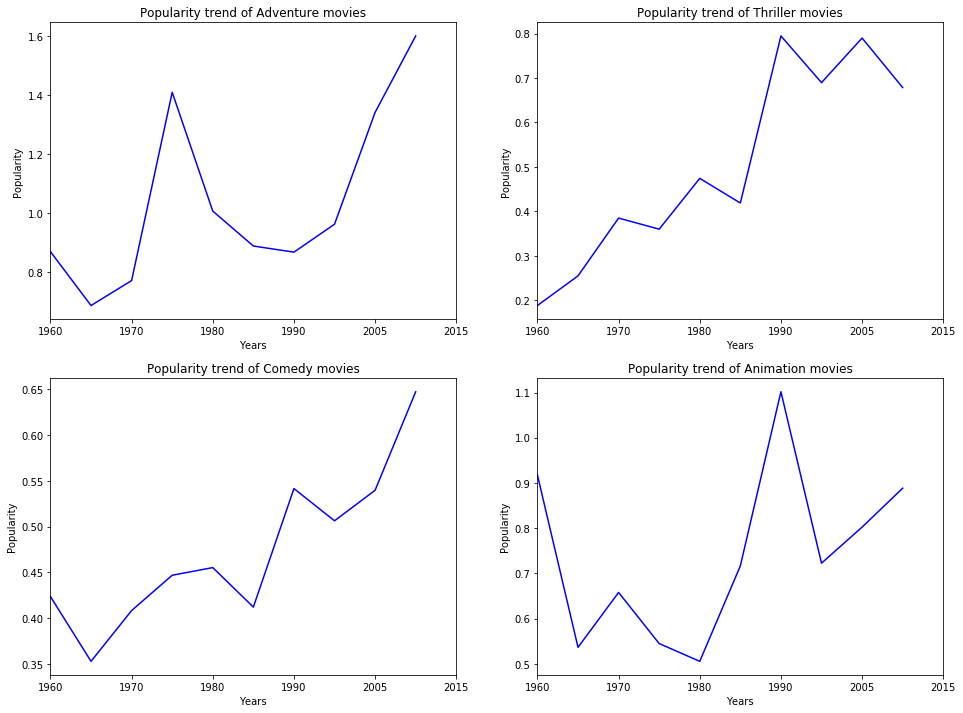

In [25]:
plt.figure(figsize=[16,12])
plt.subplot(2,2,1)

a.plot(kind='line',color = 'b', )
plt.title("Popularity trend of Adventure movies")
plt.xlabel("Years")
plt.ylabel("Popularity")

plt.subplot(2,2,2)
b.plot(kind='line',color = 'b', )
plt.title("Popularity trend of Thriller movies")
plt.xlabel("Years")
plt.ylabel("Popularity")

plt.subplot(2,2,3)
c.plot(kind='line',color = 'b', )
plt.title("Popularity trend of Comedy movies")
plt.xlabel("Years")
plt.ylabel("Popularity")

plt.subplot(2,2,4)
d.plot(kind='line',color = 'b', )
plt.title("Popularity trend of Animation movies")
plt.xlabel("Years")
plt.ylabel("Popularity")


<a id='eda'></a>

###  Analysis

-> We can find the popularity of Adventure movie dived got reduced after 1970s till mid 1990s. From 2000s the popularity of these movies is increasing   linearly.

-> Thriller movies became much popular during 1985-1990 and has then faced less dive in its popularity.

->Comedy movies have fairly popular with few small dives. From 2005 they are also becoming popular.

->The most stupefying analysis, aniamted movies were the most popular among the four genre in 1960s.
 Animated movies have sharp dives both upward and downward. Showing mercurial attitude of people towards animated movies
 
-> Also we can clearly see there is no relation between year and popularity

### 2.) Relation between popularity,budget and revenue?
    a.) How is budget and revenue related?
    b.) How is popularity and revenue related?
    c.) How is budget and popularity related?

Here I will apply Simple linear regression, to find  how much variability of one variable affects the other i.e Rsquared value

**Relation of questions 2.a**

In [26]:
df['intercept']=1
lm=sm.OLS(df['revenue'],df[['budget','intercept']])
r=lm.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                 1.114e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        04:09:47   Log-Likelihood:            -2.1326e+05
No. Observations:               10866   AIC:                         4.265e+05
Df Residuals:                   10864   BIC:                         4.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         2.9205      0.028    105.547      0.000       2.866       2.975
intercept  -2.568e+07   9.91e+05    -25.922      0.000   -2.76e+07   -2.37e+07
==============================================================================
Omnibus:                     7742.233   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4528035.077
Skew:                           2.153   Prob(JB):                         0.00
Kurtosis:                     102.913   Cond. No.                     4.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Relation of questions 2.b**

In [27]:
df['intercept']=1
lm=sm.OLS(df['revenue'],df[['popularity','intercept']])
r=lm.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     7733.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        04:09:47   Log-Likelihood:            -2.1417e+05
No. Observations:               10866   AIC:                         4.283e+05
Df Residuals:                   10864   BIC:                         4.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
popularity  7.413e+07   8.43e+05     87.936      0.000    7.25e+07    7.58e+07
intercept  -8.491e+06      1e+06     -8.458      0.000   -1.05e+07   -6.52e+06
==============================================================================
Omnibus:                     6459.937   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3878220.733
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                      95.503   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Relation of questions 2.c**

In [28]:
df['intercept']=1
lm=sm.OLS(df['popularity'],df[['budget','intercept']])
r=lm.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3943.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        04:09:47   Log-Likelihood:                -13738.
No. Observations:               10866   AIC:                         2.748e+04
Df Residuals:                   10864   BIC:                         2.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget      1.842e-08   2.93e-10     62.790      0.000    1.78e-08     1.9e-08
intercept      0.2357      0.011     22.439      0.000       0.215       0.256
==============================================================================
Omnibus:                    17941.972   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33160633.846
Skew:                          10.685   Prob(JB):                         0.00
Kurtosis:                     272.789   Cond. No.                     4.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Revenue')

<Figure size 1008x864 with 0 Axes>

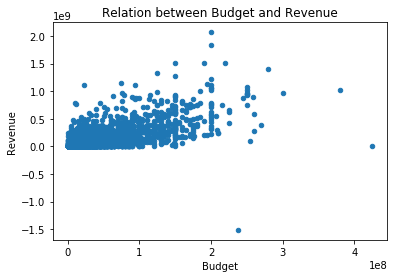

In [29]:
plt.figure(figsize=(14,12))
df.plot(kind='scatter',x='budget',y='revenue')
plt.title("Relation between Budget and Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")



Text(0, 0.5, 'Revenue')

<Figure size 1008x864 with 0 Axes>

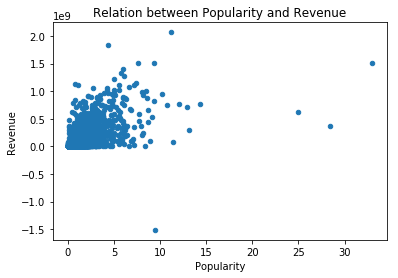

In [30]:
plt.figure(figsize=(14,12))
df.plot(kind='scatter',x='popularity',y='revenue')
plt.title("Relation between Popularity and Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")



Text(0, 0.5, 'Popularity')

<Figure size 1008x864 with 0 Axes>

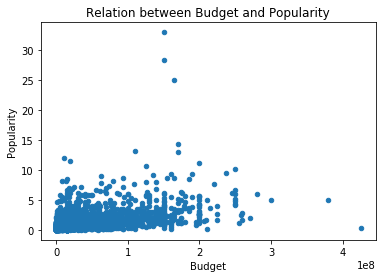

In [31]:
plt.figure(figsize=(14,12))
df.plot(kind='scatter',x='budget',y='popularity')
plt.title("Relation between Budget and Popularity")
plt.xlabel("Budget")
plt.ylabel("Popularity")


**Analysis**

->R squared value of 0.508  in Budget and Revenue relations shows 50.8% of  varaiablity of Revenue depends on the Budget of the movie

->R squared value of 0.416 in Popularity and Revenue relation shows 41.6% of variability of Revenue depends on Popularity of the movie.
    of the two we can compare, for revenue of movie Budget plays more importatn role
    
->R squared value of 0.266 in Budget and Popularity relations shows only 26.6% of variability of Popularity depends on Budget, moreover since the value if closer to 0, our Simple Linear model does not fit well.    

### 3.) Whose movie earned the highest total revenue? 
    a.) Leonardo DiCaprio
    b.) Dwayne Johnson
    c.) Tom Cruise
    d.) Christian Bale

These are the actors whose movies have created mega box office hits and some of their movies are also my personal fav. :)

In [32]:
df_leo=df[df['cast'].str.contains('Leonardo DiCaprio')]['revenue'].sum()


In [33]:
df_dwa=df[df['cast'].str.contains('Dwayne Johnson')]['revenue'].sum()


In [34]:
df_tom=df[df['cast'].str.contains('Tom Cruise')]['revenue'].sum()


In [35]:
df_chr=df[df['cast'].str.contains('Christian Bale')]['revenue'].sum()


Text(0.5, 0, 'Revenue')

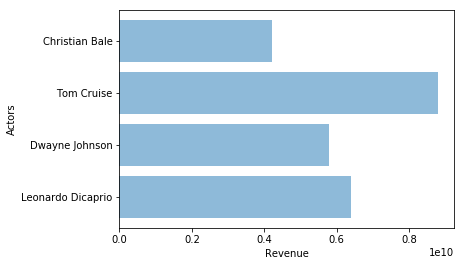

In [41]:
names=('Leonardo Dicaprio','Dwayne Johnson','Tom Cruise','Christian Bale')
y_pos=np.arange(len(names))
reve=[df_leo,df_dwa,df_tom,df_chr]
plt.barh(y_pos,reve,alpha=0.5)
plt.yticks(y_pos,names)
plt.ylabel('Actors')
plt.xlabel('Revenue')



**Analysis**

We can clearly see Earnings of Tom Cruise is the highest among the four actors and Christian Bale earned the least. x axis is in exponentionl to 10, its obvious the sum total earnings of this actors are in millions!!

<a id='conclusions'></a>
## Conclusions

> Popularity Trends of different movie genres was found through the timeline, thoughg the reason behind the increase and decrease in popularity could not be found from the data available 

> Simple linear regression model was used to find in between relation of budget, popularity and revenue. But a considerable result was only found in Budget and Revenue, which showed variability of 50.8% in revenue because of Budget. Other relations were not satisfactory and hinted other models to be applied 